# Topology meets TPMS
## TPMS part

In [1]:
porosity_list_Schwarz_p = [] #здесь будет вся пористость по Шварцу
porosity_list_Gyroid = [] # Здесь будет вся пористость по Героину

In [5]:
import numpy as np
import pyvista as pv
import csv

# количество генерируемых точек для поверхности. В дальнейшем задаваемый параметр
count_pount = 1000
def generate_points(count_pount):
    one_axis = np.linspace(-np.pi, np.pi, count_pount)
    xyz_mesh = np.meshgrid(one_axis, one_axis, one_axis)
    x,y,z = xyz_mesh
    return x,y,z
    

# генерация случайных чисел для парметра d
size = 20
np.random.seed(1999)
d_params = sorted(np.random.uniform(low=-0.99, high=0.99, size=size)) #В этом массиве все параметры d



def generate_tpms_Schwarz_p(d_params):
    x,y,z = generate_points(count_pount)
    
    porosity_list = []
    pointcloud_list = []
    
    for i in range(len(d_params)):
        Schwarz_p = np.cos(x) + np.cos(y) + np.cos(z) + d_params[i] #эт формула поверхности Шварца
        tolerance = 0.001
        x0,y0,z0 = np.where(abs(Schwarz_p)<tolerance)
        pointcloud = np.vstack((x0,y0,z0)).T
        cube_volume = (np.min(x0) + np.max(x0)) * (np.min(y0) + np.max(y0)) * (np.min(z0) + np.max(z0)) #Объем кубика
        cloud = pv.PolyData(pointcloud)
        surface = cloud.reconstruct_surface() # Облако точек для расчета объема
        surface_volume = surface.volume # Объем поверхности
        porosity = (cube_volume-surface_volume)/cube_volume #расчитываем удельную пористость
        porosity_list.append(porosity)
        pointcloud_list.append(pointcloud)

    return porosity_list, pointcloud_list

porosity_list, pointcloud_list = generate_tpms_Schwarz_p(d_params)
pointcloud_list[0]

C:\Users\User\miniconda3\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


array([[ 1, 47, 48],
       [ 1, 47, 51],
       [ 1, 48, 47],
       ...,
       [98, 51, 52],
       [98, 52, 48],
       [98, 52, 51]], dtype=int64)

In [8]:
import numpy as np
import pyvista as pv
import csv

# количество генерируемых точек для поверхности. В дальнейшем задаваемый параметр
count_pount = 100
def generate_points(count_pount):
    one_axis = np.linspace(-np.pi, np.pi, count_pount)
    xyz_mesh = np.meshgrid(one_axis, one_axis, one_axis)
    x,y,z = xyz_mesh
    return x,y,z
    

# генерация случайных чисел для парметра d
size = 20
np.random.seed(1999)
d_params = sorted(np.random.uniform(low=-0.99, high=0.99, size=size)) #В этом массиве все параметры d



def generate_tpms_Gyroid(d_params):
    x,y,z = generate_points(count_pount)
    porosity_list = []
    pointcloud_list = []
    for i in range(len(d_params)):
        Gyroid = np.cos(x)*np.sin(y) + np.cos(y)*np.sin(z) + np.cos(z)*np.sin(x) + d_params[i]
        tolerance = 0.001
        x0,y0,z0 = np.where(abs(Gyroid)<tolerance)
        pointcloud = np.vstack((x0,y0,z0)).T
        cube_volume = (np.min(x0) + np.max(x0)) * (np.min(y0) + np.max(y0)) * (np.min(z0) + np.max(z0))
        cloud = pv.PolyData(pointcloud)
        surface = cloud.reconstruct_surface() 
        surface_volume = surface.volume 
        porosity = (cube_volume-surface_volume)/cube_volume 
        porosity_list.append(porosity)
        pointcloud_list.append(pointcloud)
    return porosity_list, pointcloud_list

porosity_list_Gyroid, pointcloud_list_Gyroid = generate_tpms_Gyroid(d_params)

In [9]:
porosity_list_Gyroid

[0.832102569990196,
 0.9535591241927197,
 0.8078820163396923,
 0.9466205700890163,
 0.9555111801523952,
 0.9719598739453094,
 0.894415436257186,
 0.9195776758665434,
 0.8003398938480929,
 0.8133800411458523,
 0.8367009681666644,
 0.8544847905532433,
 0.9229313715512674,
 0.8801345922581865,
 0.8293213166140078,
 0.8917107479881942,
 0.6951076409028047,
 0.7251606329572926,
 0.8809848695487532,
 0.8757553280807521]

In [1]:
import pandas as pd

df_linear_dependency = pd.DataFrame()
df_linear_dependency['d_param'] = d_params
df_linear_dependency['porosity_Schwarz_p'] = porosity_list_Schwarz_p
df_linear_dependency['porosity_Gyroid'] = porosity_list_Gyroid
df_linear_dependency.to_csv('linear_dependency.csv', index=False)

NameError: name 'd_params' is not defined

In [6]:
import pandas as pd
data = pd.read_csv('linear_dependency.csv')
data.head(10)

,d_param,porosity_Schwarz_p,porosity_Gyroid
0,-0.985086,0.796602,0.806768
1,-0.834337,0.777147,0.831175
2,-0.602925,0.759682,0.859706
3,-0.357099,0.730533,0.887477
4,-0.350885,0.730399,0.887931
5,-0.262321,0.707480,0.896708
6,-0.086151,0.681178,0.995867
7,0.184648,0.667845,0.989362
8,0.429486,0.689464,0.989704
9,0.446178,0.685388,0.992671


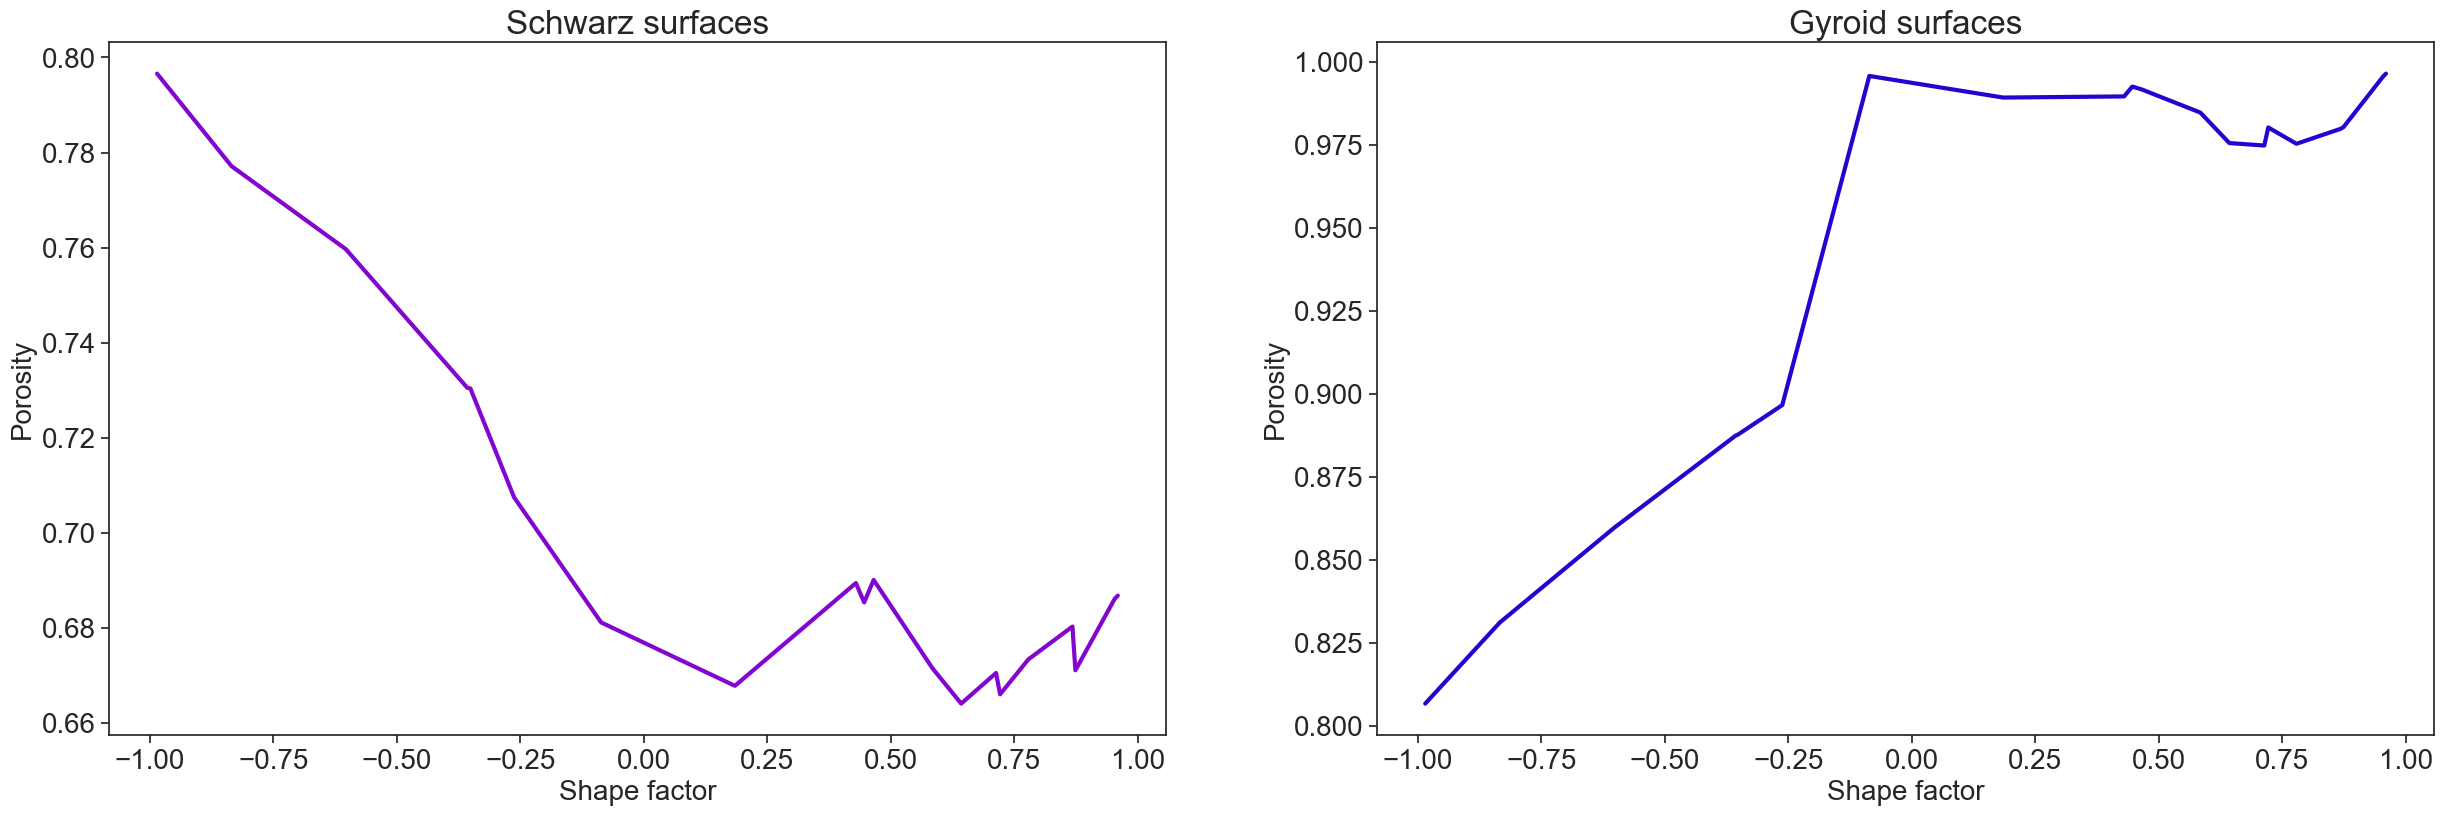

In [7]:
#Импорт рисовыалок
import seaborn as sns
import matplotlib.pyplot as plt

# Фукция для графиков линейной зависимости параметра d от пористости поверхностей Шварца и Героида
def viza_for_dependency(x, y1, y2):
    sns.set(style='ticks')
    fig, axes = plt.subplots(figsize=(30, 9), ncols=2, nrows=1)

    sns.lineplot(x=x, y=y1, ax=axes[0], color='#8206cf', linewidth=3)
    sns.lineplot(x=x, y=y2, ax=axes[1], color='#2106cf', linewidth=3)

    axes[0].set_title('Schwarz surfaces', fontsize=24)
    axes[1].set_title('Gyroid surfaces', fontsize=24)

    axes[0].set_xlabel('Shape factor', fontsize=20)
    axes[0].set_ylabel('Porosity', fontsize=20)

    axes[1].set_xlabel('Shape factor', fontsize=20)
    axes[1].set_ylabel('Porosity', fontsize=20)

    axes[0].tick_params(axis='both', which='major', labelsize=20)
    axes[1].tick_params(axis='both', which='major', labelsize=20)

    plt.show()
    
fig = viza_for_dependency(data['d_param'], data['porosity_Schwarz_p'], data['porosity_Gyroid'])